# M06_S2_Teknikal_WebScraping

# Preparation



In [ ]:
# download dan instal modul yang dibutuhkan

!pip install builtwith
!pip install python-whois

  Created wheel for builtwith: filename=builtwith-1.3.4-py3-none-any.whl size=36097 sha256=f8d0d7a9f8dbcf20064ffef4fef0987667003e853310fa7acd8e31bb9b2bdc99
  Stored in directory: /root/.cache/pip/wheels/72/37/d7/ee9677e57e69fec72898a783876aac646c041fa097e3a87631
Successfully built builtwith
     |████████████████████████████████| 91 kB 4.2 MB/s 
  Created wheel for python-whois: filename=python_whois-0.7.3-py3-none-any.whl size=87720 sha256=d60c9190cd417af2c25032dc3f7f7822b24363a552d12c540dfc0bad62d309e3
  Stored in directory: /root/.cache/pip/wheels/11/05/f7/895ce5a73665f77c8274a7d55e34fb3e6b4abbb9a7637e215b
Successfully built python-whois


In [ ]:
# Import Library yang dibutuhkan

import urllib3
from bs4 import BeautifulSoup
import builtwith
import whois

## 1. robots.txt
Cari website target, lalu cek robots.txt website


In [ ]:
# Cek robot.txt dari website target

# Creating a PoolManager instance for sending requests.
http = urllib3.PoolManager()
urllib3.disable_warnings() #disable annoying warnings

# Sending a GET request and getting back response as HTTPResponse object.
resp = http.request("GET", "https://quotes.toscrape.com/robots.txt")

# Print the returned data.
print(resp.data)

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n<title>404 Not Found</title>\n<h1>Not Found</h1>\n<p>The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.</p>\n'


In [ ]:
# Contoh Sukses
html = http.request("GET", 'http://pythonscraping.com/robots.txt')
print(html.data)

b'#\n# robots.txt\n#\n# This file is to prevent the crawling and indexing of certain parts\n# of your site by web crawlers and spiders run by sites like Yahoo!\n# and Google. By telling these "robots" where not to go on your site,\n# you save bandwidth and server resources.\n#\n# This file will be ignored unless it is at the root of your host:\n# Used:    http://example.com/robots.txt\n# Ignored: http://example.com/site/robots.txt\n#\n# For more information about the robots.txt standard, see:\n# http://www.robotstxt.org/robotstxt.html\n#\n# For syntax checking, see:\n# http://www.frobee.com/robots-txt-check\n\nUser-agent: *\nCrawl-delay: 10\n# Directories\nDisallow: /includes/\nDisallow: /misc/\nDisallow: /modules/\nDisallow: /profiles/\nDisallow: /scripts/\nDisallow: /themes/\n# Files\nDisallow: /CHANGELOG.txt\nDisallow: /cron.php\nDisallow: /INSTALL.mysql.txt\nDisallow: /INSTALL.pgsql.txt\nDisallow: /INSTALL.sqlite.txt\nDisallow: /install.php\nDisallow: /INSTALL.txt\nDisallow: /LICEN

## 2. Web size
Estimasi ukuran website dengan searching di google menggunakan site:https://quotes.toscrape.com/
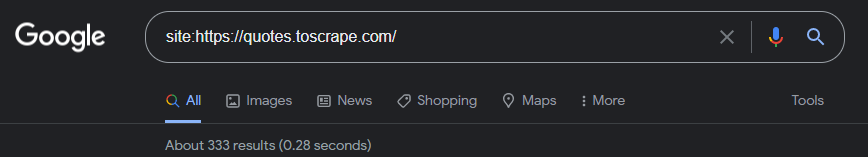

## 3. Builtwith
Cek teknologi website dibuat menggunakan library builtwith


In [ ]:
# Cek teknologi website dibuat menggunakan library builtwith

builtwith.parse('https://quotes.toscrape.com/')

{'web-frameworks': ['Twitter Bootstrap'], 'web-servers': ['Nginx']}

## 4. Whois
Cek pemilik website menggunakan protokol whois dengan library python-whois

In [ ]:
# Cek pemilik website menggunakan protokol whois dengan library python-whois

print(whois.whois('https://quotes.toscrape.com/'))

{
  "domain_name": [
    "TOSCRAPE.COM",
    "toscrape.com"
  ],
  "registrar": "Amazon Registrar, Inc.",
  "whois_server": "whois.registrar.amazon.com",
  "referral_url": null,
  "updated_date": [
    "2021-05-25 22:54:15",
    "2021-05-25 22:54:16.257000"
  ],
  "creation_date": "2016-06-28 20:26:52",
  "expiration_date": "2022-06-28 20:26:52",
  "name_servers": [
    "NS-1192.AWSDNS-21.ORG",
    "NS-1782.AWSDNS-30.CO.UK",
    "NS-437.AWSDNS-54.COM",
    "NS-740.AWSDNS-28.NET",
    "ns-1192.awsdns-21.org",
    "ns-1782.awsdns-30.co.uk",
    "ns-437.awsdns-54.com",
    "ns-740.awsdns-28.net"
  ],
  "status": [
    "clientTransferProhibited https://icann.org/epp#clientTransferProhibited",
    "renewPeriod https://icann.org/epp#renewPeriod"
  ],
  "emails": [
    "abuse@amazonaws.com",
    "owner-1961310@toscrape.com.whoisprivacyservice.org",
    "admin-1961310@toscrape.com.whoisprivacyservice.org",
    "tech-1961310@toscrape.com.whoisprivacyservice.org"
  ],
  "dnssec": "unsigned",
  "

## 5. Web page Analysis
menggunakan inspect untuk mengetahui class author.
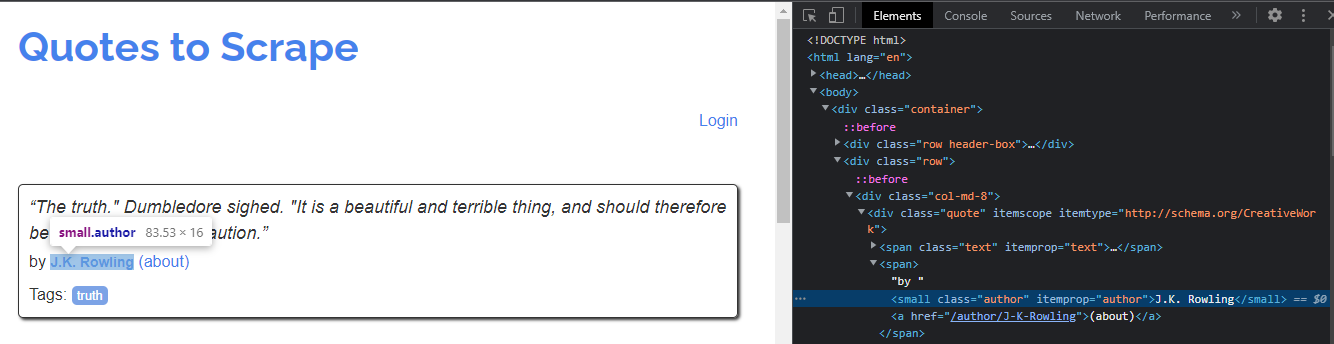

# Static Web Scraping

## Single Page

In [ ]:
# Scrap entire page
html = http.request("GET", 'https://quotes.toscrape.com/')
print(html.data)

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<meta charset="UTF-8">\n\t<title>Quotes to Scrape</title>\n    <link rel="stylesheet" href="/static/bootstrap.min.css">\n    <link rel="stylesheet" href="/static/main.css">\n</head>\n<body>\n    <div class="container">\n        <div class="row header-box">\n            <div class="col-md-8">\n                <h1>\n                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>\n                </h1>\n            </div>\n            <div class="col-md-4">\n                <p>\n                \n                    <a href="/login">Login</a>\n                \n                </p>\n            </div>\n        </div>\n    \n\n<div class="row">\n    <div class="col-md-8">\n\n    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">\n        <span class="text" itemprop="text">\xe2\x80\x9cThe world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.\xe2\x80\

In [ ]:
# Scrap only <title> tag from page
html = http.request("GET", 'https://quotes.toscrape.com/')
soup = BeautifulSoup(html.data, 'html.parser')
print(soup.title)
print(soup.title.text)

<title>Quotes to Scrape</title>
Quotes to Scrape


In [ ]:
# Scrap author class from page
html = http.request("GET", 'https://quotes.toscrape.com/')
soup = BeautifulSoup(html.data, 'html.parser')
author = []
for i in soup.find_all("small", class_="author"):
        author.append(i.get_text(strip=True))
print(author)

['Albert Einstein', 'J.K. Rowling', 'Albert Einstein', 'Jane Austen', 'Marilyn Monroe', 'Albert Einstein', 'André Gide', 'Thomas A. Edison', 'Eleanor Roosevelt', 'Steve Martin']


In [ ]:
# Scrap data tertentu menggunakan Regular Expression (Regex)
import re
import urllib.request

response = urllib.request.urlopen('https://quotes.toscrape.com/')
html = response.read()
text = html.decode()
re.findall('<small class="author" itemprop="author">(.*?)</small>',text)

['Albert Einstein',
 'J.K. Rowling',
 'Albert Einstein',
 'Jane Austen',
 'Marilyn Monroe',
 'Albert Einstein',
 'André Gide',
 'Thomas A. Edison',
 'Eleanor Roosevelt',
 'Steve Martin']

## Multiple Pages

In [ ]:
page = 1
author = []
urllib3.disable_warnings()

# lakukan looping hingga semua halaman ditelusuri
while page != 11:
      url = f"https://quotes.toscrape.com/page/{page}/"
      req = http.request("GET", url)
      soup = BeautifulSoup(req.data, 'html.parser')
      for i in soup.find_all("small", class_="author"):
        author.append(i.get_text(strip=True))
      page = page + 1

# menampilkan author yang unique
set(author) 

{'Albert Einstein',
 'Alexandre Dumas fils',
 'Alfred Tennyson',
 'Allen Saunders',
 'André Gide',
 'Ayn Rand',
 'Bob Marley',
 'C.S. Lewis',
 'Charles Bukowski',
 'Charles M. Schulz',
 'Douglas Adams',
 'Dr. Seuss',
 'E.E. Cummings',
 'Eleanor Roosevelt',
 'Elie Wiesel',
 'Ernest Hemingway',
 'Friedrich Nietzsche',
 'Garrison Keillor',
 'George Bernard Shaw',
 'George Carlin',
 'George Eliot',
 'George R.R. Martin',
 'Harper Lee',
 'Haruki Murakami',
 'Helen Keller',
 'J.D. Salinger',
 'J.K. Rowling',
 'J.M. Barrie',
 'J.R.R. Tolkien',
 'James Baldwin',
 'Jane Austen',
 'Jim Henson',
 'Jimi Hendrix',
 'John Lennon',
 'Jorge Luis Borges',
 'Khaled Hosseini',
 "Madeleine L'Engle",
 'Marilyn Monroe',
 'Mark Twain',
 'Martin Luther King Jr.',
 'Mother Teresa',
 'Pablo Neruda',
 'Ralph Waldo Emerson',
 'Stephenie Meyer',
 'Steve Martin',
 'Suzanne Collins',
 'Terry Pratchett',
 'Thomas A. Edison',
 'W.C. Fields',
 'William Nicholson'}

# Menyimpan data

## File media
Gambar, video, dsb.

In [ ]:
# download image jika sudah diketahui url nya
url = "https://books.toscrape.com/media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"
r = http.request("GET", url)

# save as jpg file
with open("book.jpg",'wb') as f:
   f.write(r.data)
   f.close()

## Export hasil scraping

In [ ]:
# Scrap only <title> tag from page
html = http.request("GET", 'https://quotes.toscrape.com/')
soup = BeautifulSoup(html.data, 'html.parser')
result = soup.title.text

# Save as txt file
with open("result.txt",'w') as f:
   f.write(str(result))
   f.close()

# Latihan

1. Lakukan langkah persiapan untuk scrap web https://books.toscrape.com/
2. Scrap https://books.toscrape.com/ untuk mencari info harga buku berdasarkan input user, dengan judul buku yang anda suka!
3. Tuliskan judul buku untuk rating >= 3 star

# Thank You!!

# Preparation



In [ ]:
# download dan instal modul yang dibutuhkan

!pip install builtwith
!pip install python-whois

  Created wheel for builtwith: filename=builtwith-1.3.4-py3-none-any.whl size=36097 sha256=f8d0d7a9f8dbcf20064ffef4fef0987667003e853310fa7acd8e31bb9b2bdc99
  Stored in directory: /root/.cache/pip/wheels/72/37/d7/ee9677e57e69fec72898a783876aac646c041fa097e3a87631
Successfully built builtwith
     |████████████████████████████████| 91 kB 4.2 MB/s 
  Created wheel for python-whois: filename=python_whois-0.7.3-py3-none-any.whl size=87720 sha256=d60c9190cd417af2c25032dc3f7f7822b24363a552d12c540dfc0bad62d309e3
  Stored in directory: /root/.cache/pip/wheels/11/05/f7/895ce5a73665f77c8274a7d55e34fb3e6b4abbb9a7637e215b
Successfully built python-whois


In [ ]:
# Import Library yang dibutuhkan

import urllib3
from bs4 import BeautifulSoup
import builtwith
import whois

## 1. robots.txt
Cari website target, lalu cek robots.txt website


In [ ]:
# Cek robot.txt dari website target

# Creating a PoolManager instance for sending requests.
http = urllib3.PoolManager()
urllib3.disable_warnings() #disable annoying warnings

# Sending a GET request and getting back response as HTTPResponse object.
resp = http.request("GET", "https://books.toscrape.com/robots.txt")

# Print the returned data.
print(resp.data)

b'<html>\r\n<head><title>404 Not Found</title></head>\r\n<body bgcolor="white">\r\n<center><h1>404 Not Found</h1></center>\r\n<hr><center>nginx/1.1.19</center>\r\n</body>\r\n</html>\r\n'


## 2. Web size
Estimasi ukuran website dengan searching di google menggunakan site:https://books.toscrape.com/
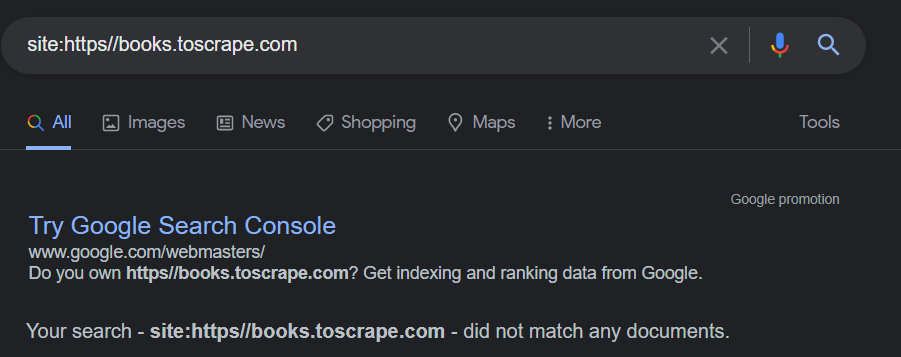

## 3. Builtwith
Cek teknologi website dibuat menggunakan library builtwith


In [ ]:
# Cek teknologi website dibuat menggunakan library builtwith

builtwith.parse('https://books.toscrape.com/')

{'javascript-frameworks': ['jQuery'],
 'web-frameworks': ['Twitter Bootstrap'],
 'web-servers': ['Nginx']}

## 4. Whois
Cek pemilik website menggunakan protokol whois dengan library python-whois

In [ ]:
# Cek pemilik website menggunakan protokol whois dengan library python-whois

print(whois.whois('https://books.toscrape.com/'))

{
  "domain_name": [
    "TOSCRAPE.COM",
    "toscrape.com"
  ],
  "registrar": "Amazon Registrar, Inc.",
  "whois_server": "whois.registrar.amazon.com",
  "referral_url": null,
  "updated_date": [
    "2021-05-25 22:54:15",
    "2021-05-25 22:54:16.257000"
  ],
  "creation_date": "2016-06-28 20:26:52",
  "expiration_date": "2022-06-28 20:26:52",
  "name_servers": [
    "NS-1192.AWSDNS-21.ORG",
    "NS-1782.AWSDNS-30.CO.UK",
    "NS-437.AWSDNS-54.COM",
    "NS-740.AWSDNS-28.NET",
    "ns-1192.awsdns-21.org",
    "ns-1782.awsdns-30.co.uk",
    "ns-437.awsdns-54.com",
    "ns-740.awsdns-28.net"
  ],
  "status": [
    "clientTransferProhibited https://icann.org/epp#clientTransferProhibited",
    "renewPeriod https://icann.org/epp#renewPeriod"
  ],
  "emails": [
    "abuse@amazonaws.com",
    "owner-1961310@toscrape.com.whoisprivacyservice.org",
    "admin-1961310@toscrape.com.whoisprivacyservice.org",
    "tech-1961310@toscrape.com.whoisprivacyservice.org"
  ],
  "dnssec": "unsigned",
  "

## 5. Web page Analysis
menggunakan inspect untuk mengetahui class author.
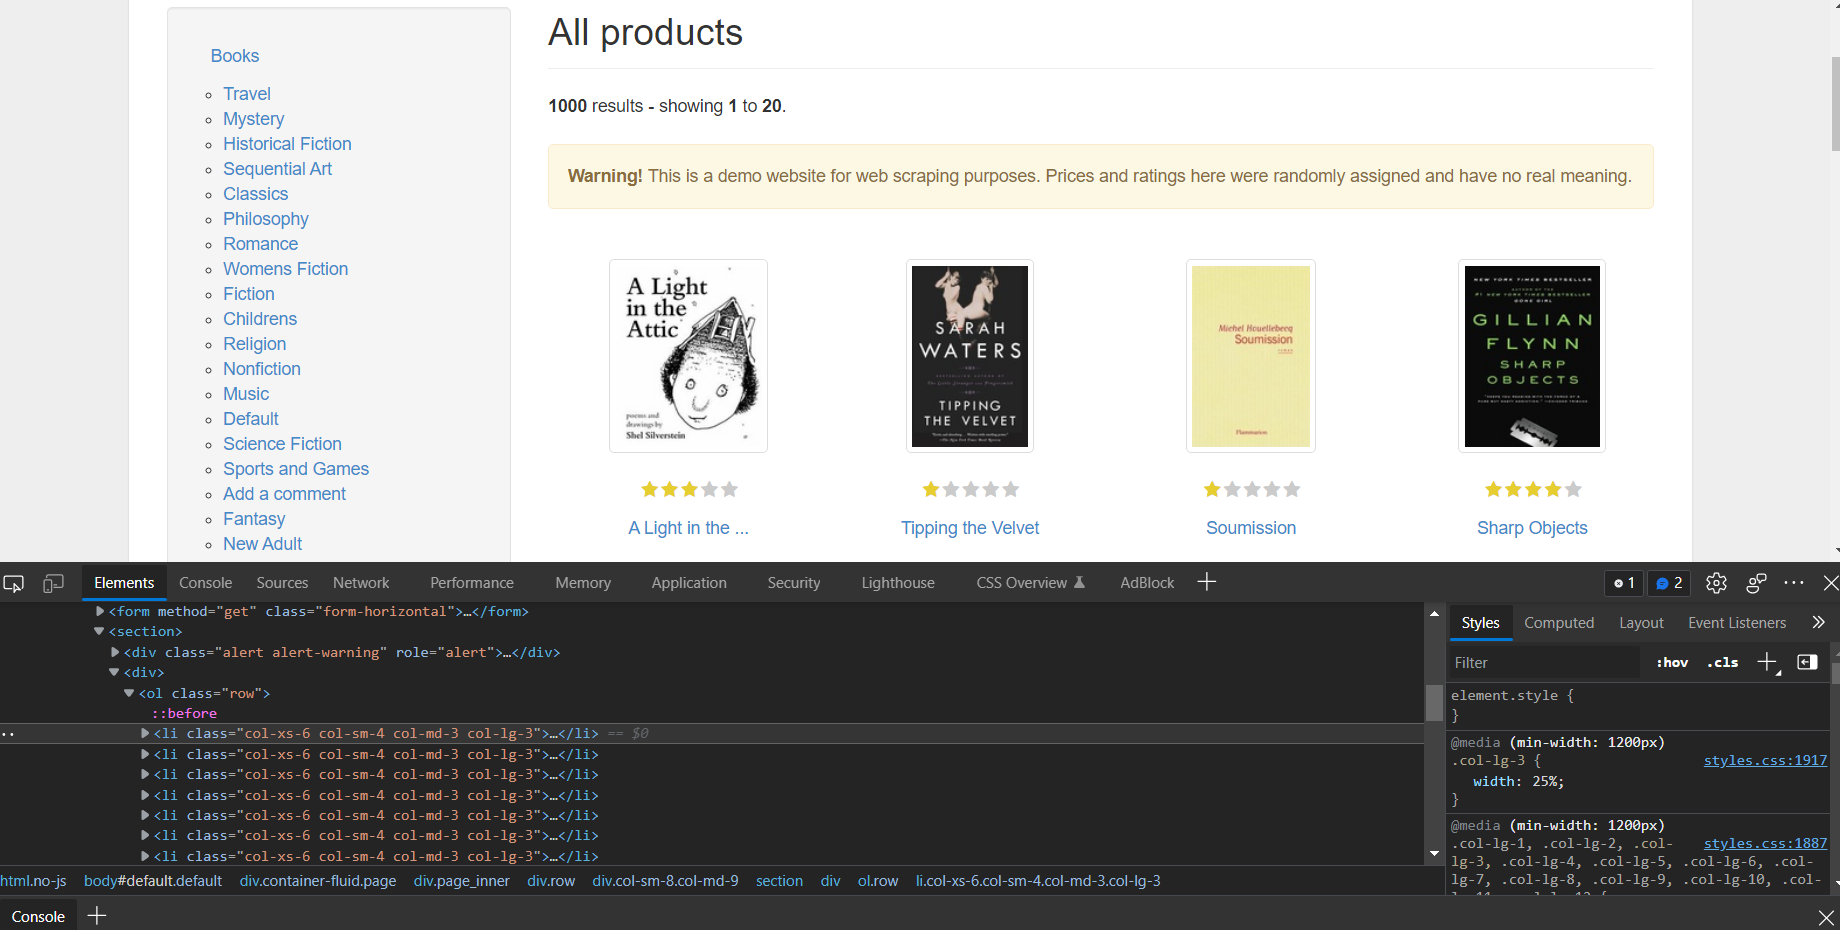

# Scraping

In [44]:
# Scrap author class from page
html = http.request("GET", 'https://books.toscrape.com/')
soup = BeautifulSoup(html.data, 'html.parser')
author = []
for i in soup.find_all("li", class_="col-xs-6 col-sm-4 col-md-3 col-lg-3"):
        author.append(i.get_text(strip=True))
print(author)

['A Light in the ...£51.77In stockAdd to basket', 'Tipping the Velvet£53.74In stockAdd to basket', 'Soumission£50.10In stockAdd to basket', 'Sharp Objects£47.82In stockAdd to basket', 'Sapiens: A Brief History ...£54.23In stockAdd to basket', 'The Requiem Red£22.65In stockAdd to basket', 'The Dirty Little Secrets ...£33.34In stockAdd to basket', 'The Coming Woman: A ...£17.93In stockAdd to basket', 'The Boys in the ...£22.60In stockAdd to basket', 'The Black Maria£52.15In stockAdd to basket', 'Starving Hearts (Triangular Trade ...£13.99In stockAdd to basket', "Shakespeare's Sonnets£20.66In stockAdd to basket", 'Set Me Free£17.46In stockAdd to basket', "Scott Pilgrim's Precious Little ...£52.29In stockAdd to basket", 'Rip it Up and ...£35.02In stockAdd to basket', 'Our Band Could Be ...£57.25In stockAdd to basket', 'Olio£23.88In stockAdd to basket', 'Mesaerion: The Best Science ...£37.59In stockAdd to basket', 'Libertarianism for Beginners£51.33In stockAdd to basket', "It's Only the Him

In [70]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:29" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="static/oscar/css/styles.css" rel="stylesheet" type="tex

In [45]:
books = soup.find_all("li", class_="col-xs-6 col-sm-4 col-md-3 col-lg-3") 
len(books)

20

In [46]:
books[0].find('img')['alt']

'A Light in the Attic'

In [47]:
star = books[0].find('p',{'class':'star-rating'})['class'][-1]

In [48]:
def convert_str_to_int(x):
  number_in_text = {
      'One':1,
      'Two':2,
      'Three':3,
      'Four':4,
      'Five':5
  }
  return number_in_text[x]

In [61]:
# Memasukkan informasi buku kedalam dictionary
list_books = []
for book in books:
  title = book.find('img')['alt']
  price = float(book.find('p', {'class': 'price_color'}).text[1:]) # Mengubah string menjadi harga float
  star = convert_str_to_int(book.find('p',{'class':'star-rating'})['class'][-1])
  list_books.append({
      'title':title,
      'price':price,
      'star':star
  })

for book in list_books:
  print(book)

{'title': 'A Light in the Attic', 'price': 51.77, 'star': 3}
{'title': 'Tipping the Velvet', 'price': 53.74, 'star': 1}
{'title': 'Soumission', 'price': 50.1, 'star': 1}
{'title': 'Sharp Objects', 'price': 47.82, 'star': 4}
{'title': 'Sapiens: A Brief History of Humankind', 'price': 54.23, 'star': 5}
{'title': 'The Requiem Red', 'price': 22.65, 'star': 1}
{'title': 'The Dirty Little Secrets of Getting Your Dream Job', 'price': 33.34, 'star': 4}
{'title': 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull', 'price': 17.93, 'star': 3}
{'title': 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics', 'price': 22.6, 'star': 4}
{'title': 'The Black Maria', 'price': 52.15, 'star': 1}
{'title': 'Starving Hearts (Triangular Trade Trilogy, #1)', 'price': 13.99, 'star': 2}
{'title': "Shakespeare's Sonnets", 'price': 20.66, 'star': 4}
{'title': 'Set Me Free', 'price': 17.46, 'star': 5}
{'title': "Scott Pilgrim's Preci

In [62]:
# Menampilkan judul buku dengan rating diatas atau sama dengan 3
for book in list_books:
  if(book['star']>=3):
    print(book['title'])

A Light in the Attic
Sharp Objects
Sapiens: A Brief History of Humankind
The Dirty Little Secrets of Getting Your Dream Job
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Shakespeare's Sonnets
Set Me Free
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Rip it Up and Start Again
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991


In [63]:
# Menyimpan dalam format json
import json

with open("books_scrapper.json", "w") as output:
  json.dump(list_books, output)

In [64]:
soup.select("li.col-xs-6.col-sm-4.col-md-3.col-lg-3")

[<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>
 </li>, <li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
 <article class="product_pod">
 <div class="image_c

In [ ]:
# with.open("file.html") as fp:
#   soup = bs4.BeautifulSoup(fp, 'html.parser')